# Projeto 1 - Alocação de alunos em PFE

Este projeto tem como objeto elaborar um algorítimo que aloque os alunos de engenharia em seus projetos finais. É de premissa dessa projeto que a melhor forma de alocar esteja correlacionada a felicidade global dos alunos, ou seja, a soma da satisfação deles quanto a alocação deve ser a maior possível. Além disso é importante ressaltar que o número de alunos é divisível por 3 e o número de projetos é equivalente a este número de alunos dividido por 3.

### Arquivos de entrada

Os arquivos de entrada trazem na primeira linha o número de alunos, o número de projetos e o número de projetos nos quais os alunos podem se inscrever. As outras linhas representam cada aluno com a ordem de escolha de seus projetos.

In [1]:
# Exemplo de arquivo de entrada
# 9 3 3  - n_alunos,n_projetos_n_choices
# 0 1 2  - aluno 1 tem prefêrencia nos projetos 0 depois 1 depois 2
# 2 1 0
# 0 1 2
# 0 2 1
# 2 0 1
# 2 1 0
# 1 0 2
# 0 1 2
# 1 2 0

### Solução ingênua

Foi disponibilizado um arquivo com uma solução ingênua em python. Esta solução não é eficiente mas encontra o melhor caso possível. O output dela traz o "score" da satisfação dos alunos, seguido se a solução é a melhor possível e por fim, a alocação de cada aluno. 
A proposta desta primeira etapa seria traduzir essa solução para C++ e analisar os desempenhos obitidos em cada um.

### Fazendo build do arquivo solucao-ingenua.cpp C++

In [2]:
! rm -R build
! mkdir build
! cmake -D CMAKE_CXX_COMPILER=g++-9 -B ./build
! make -C ./build

-- The C compiler identification is AppleClang 11.0.0.11000033
-- The CXX compiler identification is GNU 9.1.0
-- Check for working C compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/cc
-- Check for working C compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Checking whether CXX compiler has -isysroot
-- Checking whether CXX compiler has -isysroot - yes
-- Checking whether CXX compiler supports OSX deployment target flag
-- Checking whether CXX compiler supports OSX deployment target flag - yes
-- Check for working CXX compiler: /usr/local/bin/g++-9
-- Check for working CXX compiler: /usr/local/bin/g++-9 -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting C

### Comparação dos desempenhos

Foram gerados arquivos de entrada de tamanhos diferentes, e o código abaixo roda ambos algoritimos tanto em Python como em C++. Foram utilizadas as trincas abaixos para gerar as entradas.

Trincas(n_alunos,n_proj,n_escolhas):
(6,2,2),
(9,3,3),
(12,4,4)

In [3]:
# Program que cria arquivos de entrada
# import random
# import numpy as np

# n_alunos = 12
# n_proj = 4
# n_escolhas = 3

# print(n_alunos, n_proj, n_escolhas)

# for i in range(n_alunos):
#     choices = np.random.permutation(n_proj)
#     print(' '.join([str(choices[c]) for c in range(n_escolhas) ]))

A infraestrutura usada está descrita abaixo:
Macbook Pro 13(2019): 
- 1.4GHz quad‑core 8th‑generation Intel Core i5 processor, Turbo Boost up to 3.9GHz
- 16GB de RAM
- Arquitetura x86_64

O tempo foi medido utilizando a biblioteca time do Python aqui no próprio relatório no jupyter notebook. Para executar os programas basta seguir a seguinte formatação no terminal:
- Python: python solucao-ingenua.py < nome_arquivo_de_entrada
- C++:  ./build/solucao-ingenua < nome_arquivo_de_entrada // depois de compilar como demostrado acima no relatório)

In [4]:
import time
lista_arquivos = ["entrada_1","entrada_2","entrada_3"]
temp_python = []
temp_cpp = []
for arq in lista_arquivos:
    print("Python")
    start = time.time()
    ! python solucao-ingenua.py < {arq}
    temp_python.append(time.time()-start)
    print("C++")
    start = time.time()
    ! ./build/solucao-ingenua < {arq}
    temp_cpp.append(time.time()-start)

Python
21 1
0 0 1 0 1 1
C++
21 1 
0 0 1 0 1 1 
Python
71 1
0 0 2 1 2 0 1 2 1
C++
71 1 
0 0 2 1 2 0 1 2 1 
Python
171 1
1 1 3 2 0 1 0 2 3 2 3 0
C++
171 1 
1 1 3 2 0 1 0 2 3 2 3 0 


### Resultados

Os dois algoritimos se validam ao retornarem os mesmos outputs. A comparação do tempo de execução de ambos é plotada abaixo.

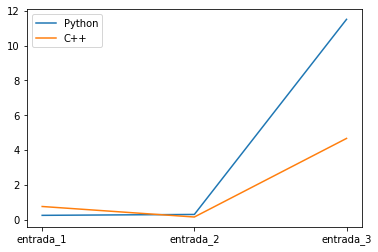

In [6]:
from matplotlib import pyplot as plt

plt.plot(lista_arquivos,temp_python,label="Python")
plt.plot(lista_arquivos,temp_cpp,label="C++")
plt.legend()

Como é possível observar, os tempos para as primeiras 2 entradas foi muito próximo, no entanto na terceira entrada a solução em C++ conseguiu ter uma eficiência muito superior que a solução em Python.